In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


DATA Processing

Training image preprocessing

In [25]:
 training_set = tf.keras.utils.image_dataset_from_directory(
     'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
     labels="inferred",
     label_mode="categorical",
     class_names=None,
     color_mode="rgb",
     batch_size=32,
     image_size=(128,128),
     shuffle=True,
     seed=None,
     validation_split=None,
     subset=None,
     interpolation="bilinear",
     follow_links=False,
     crop_to_aspect_ratio=False
 )

Found 70295 files belonging to 38 classes.


validation Image 

In [26]:
 validation_set = tf.keras.utils.image_dataset_from_directory(
     'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
     labels="inferred",
     label_mode="categorical",
     class_names=None,
     color_mode="rgb",
     batch_size=32,
     image_size=(128,128),
     shuffle=True,
     seed=None,
     validation_split=None,
     subset=None,
     interpolation="bilinear",
     follow_links=False,
     crop_to_aspect_ratio=False
 )

Found 17572 files belonging to 38 classes.


To avoid Overshooting loss function 
1) choose small learning rate. default=0.01 , we will take 0.0001
2) There may be chance of underfitting so increase no. of neurons
3) Add more Convolutional layer to extract more features from images


Building Model

In [27]:
cnn = tf.keras.models.Sequential()

Building Convolutional layer

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [33]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [34]:
cnn.add(tf.keras.layers.Flatten())

In [35]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [36]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [37]:
#output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compiling and training phase

In [38]:
pip install tf_keras

Note: you may need to restart the kernel to use updated packages.


In [39]:
import os
os.environ['TF_USE_LEGACY_KERAS']='True'

In [40]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2244s 1s/step - accuracy: 0.3964 - loss: 2.1547 - val_accuracy: 0.8523 - val_loss: 0.4662
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1783s 811ms/step - accuracy: 0.8308 - loss: 0.5301 - val_accuracy: 0.9064 - val_loss: 0.2852
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1904s 867ms/step - accuracy: 0.9014 - loss: 0.3054 - val_accuracy: 0.9267 - val_loss: 0.2262
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2208s 1s/step - accuracy: 0.9298 - loss: 0.2124 - val_accuracy: 0.9451 - val_loss: 0.1668
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2669s 1s/step - accuracy: 0.9504 - loss: 0.1541 - val_accuracy: 0.9484 - val_loss: 0.1533
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2328s 1s/step - accuracy: 0.9583 - loss: 0.1263 - val_accuracy: 0.9543 - val_loss: 0.1480
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2093s 953ms/step - accuracy: 0.9705 - loss: 0.0900 - val_accuracy: 0.9522 - val_loss: 0.1599
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1818s 827ms/step - accura

Evaluate model

In [43]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 641s 292ms/step - accuracy: 0.9891 - loss: 0.0337
Training accuracy: 0.9901415705680847


In [44]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:',val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 182s 330ms/step - accuracy: 0.9616 - loss: 0.1268
Validation accuracy: 0.9638060331344604


Saving Model

In [45]:
cnn.save('trained_plant_disease_plant_model.keras')

In [46]:
training_history.history   

{'accuracy': [0.6000995635986328,
  0.8561917543411255,
  0.9118571877479553,
  0.936652660369873,
  0.9547336101531982,
  0.9617469310760498,
  0.9709083437919617,
  0.9732413291931152,
  0.9797709584236145,
  0.980951726436615],
 'loss': [1.3598747253417969,
  0.45120203495025635,
  0.2717393636703491,
  0.19358767569065094,
  0.14014381170272827,
  0.11582089960575104,
  0.08809620887041092,
  0.08071621507406235,
  0.0630078986287117,
  0.05924071744084358],
 'val_accuracy': [0.852264940738678,
  0.9064420461654663,
  0.926701545715332,
  0.9450830817222595,
  0.9483838081359863,
  0.9543023109436035,
  0.9521966576576233,
  0.9630093574523926,
  0.9639198780059814,
  0.9638060331344604],
 'val_loss': [0.46615391969680786,
  0.28516146540641785,
  0.22624412178993225,
  0.1668388396501541,
  0.15334296226501465,
  0.14798781275749207,
  0.1599472165107727,
  0.12507949769496918,
  0.12443312257528305,
  0.12428203970193863]}

In [49]:
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [50]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


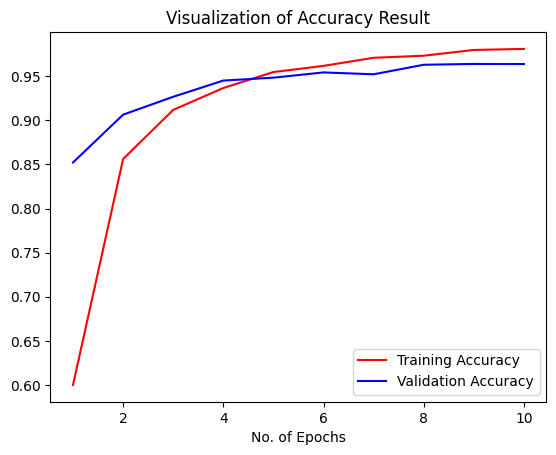

In [51]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Some other metrics for model evaluation

In [52]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [53]:
 test_set = tf.keras.utils.image_dataset_from_directory(
     'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
     labels="inferred",
     label_mode="categorical",
     class_names=None,
     color_mode="rgb",
     batch_size=1,
     image_size=(128,128),
     shuffle=False,
     seed=None,
     validation_split=None,
     subset=None,
     interpolation="bilinear",
     follow_links=False,
     crop_to_aspect_ratio=False
 )

Found 17572 files belonging to 38 classes.


In [54]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 398s 23ms/step


In [55]:
y_pred = cnn.predict(test_set)
y_pred, y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 350s 20ms/step


(array([[9.9966526e-01, 2.9615118e-04, 6.3716868e-07, ..., 1.7883582e-11,
         1.3979119e-10, 1.5743071e-10],
        [9.9999642e-01, 3.6103611e-06, 3.2466965e-10, ..., 2.1044871e-16,
         9.1448150e-14, 1.9176733e-14],
        [9.9999976e-01, 5.1946003e-10, 4.6411257e-09, ..., 5.8023243e-15,
         8.6811390e-13, 9.7604292e-13],
        ...,
        [8.5764897e-09, 9.8857000e-10, 4.5542447e-07, ..., 1.0610425e-08,
         1.9498250e-09, 9.9995089e-01],
        [2.9273770e-09, 1.5271836e-11, 6.9210735e-09, ..., 8.9906760e-10,
         9.9567778e-11, 9.9999940e-01],
        [8.1063101e-11, 2.2485937e-12, 1.3415204e-10, ..., 1.8970785e-11,
         8.4525009e-09, 9.9999690e-01]], dtype=float32),
 (17572, 38))

In [56]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
y_true=tf.argmax(true_categories, axis=1)

In [57]:
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [59]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [60]:
!pip install scikit-learn

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
cm = confusion_matrix(y_true,predicted_categories)

In [67]:
cm

array([[488,   6,   1, ...,   0,   0,   0],
       [  1, 484,   1, ...,   0,   0,   0],
       [  1,   0, 432, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 490,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  2,   0,   1, ...,   0,   0, 463]], dtype=int64)

In [68]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       0.97      0.97      0.97       497
                          Apple___Cedar_apple_rust       0.95      0.98      0.97       440
                                   Apple___healthy       0.97      0.95      0.96       502
                               Blueberry___healthy       0.96      0.97      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.86      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.98      0.

Confusion Matrix visualization

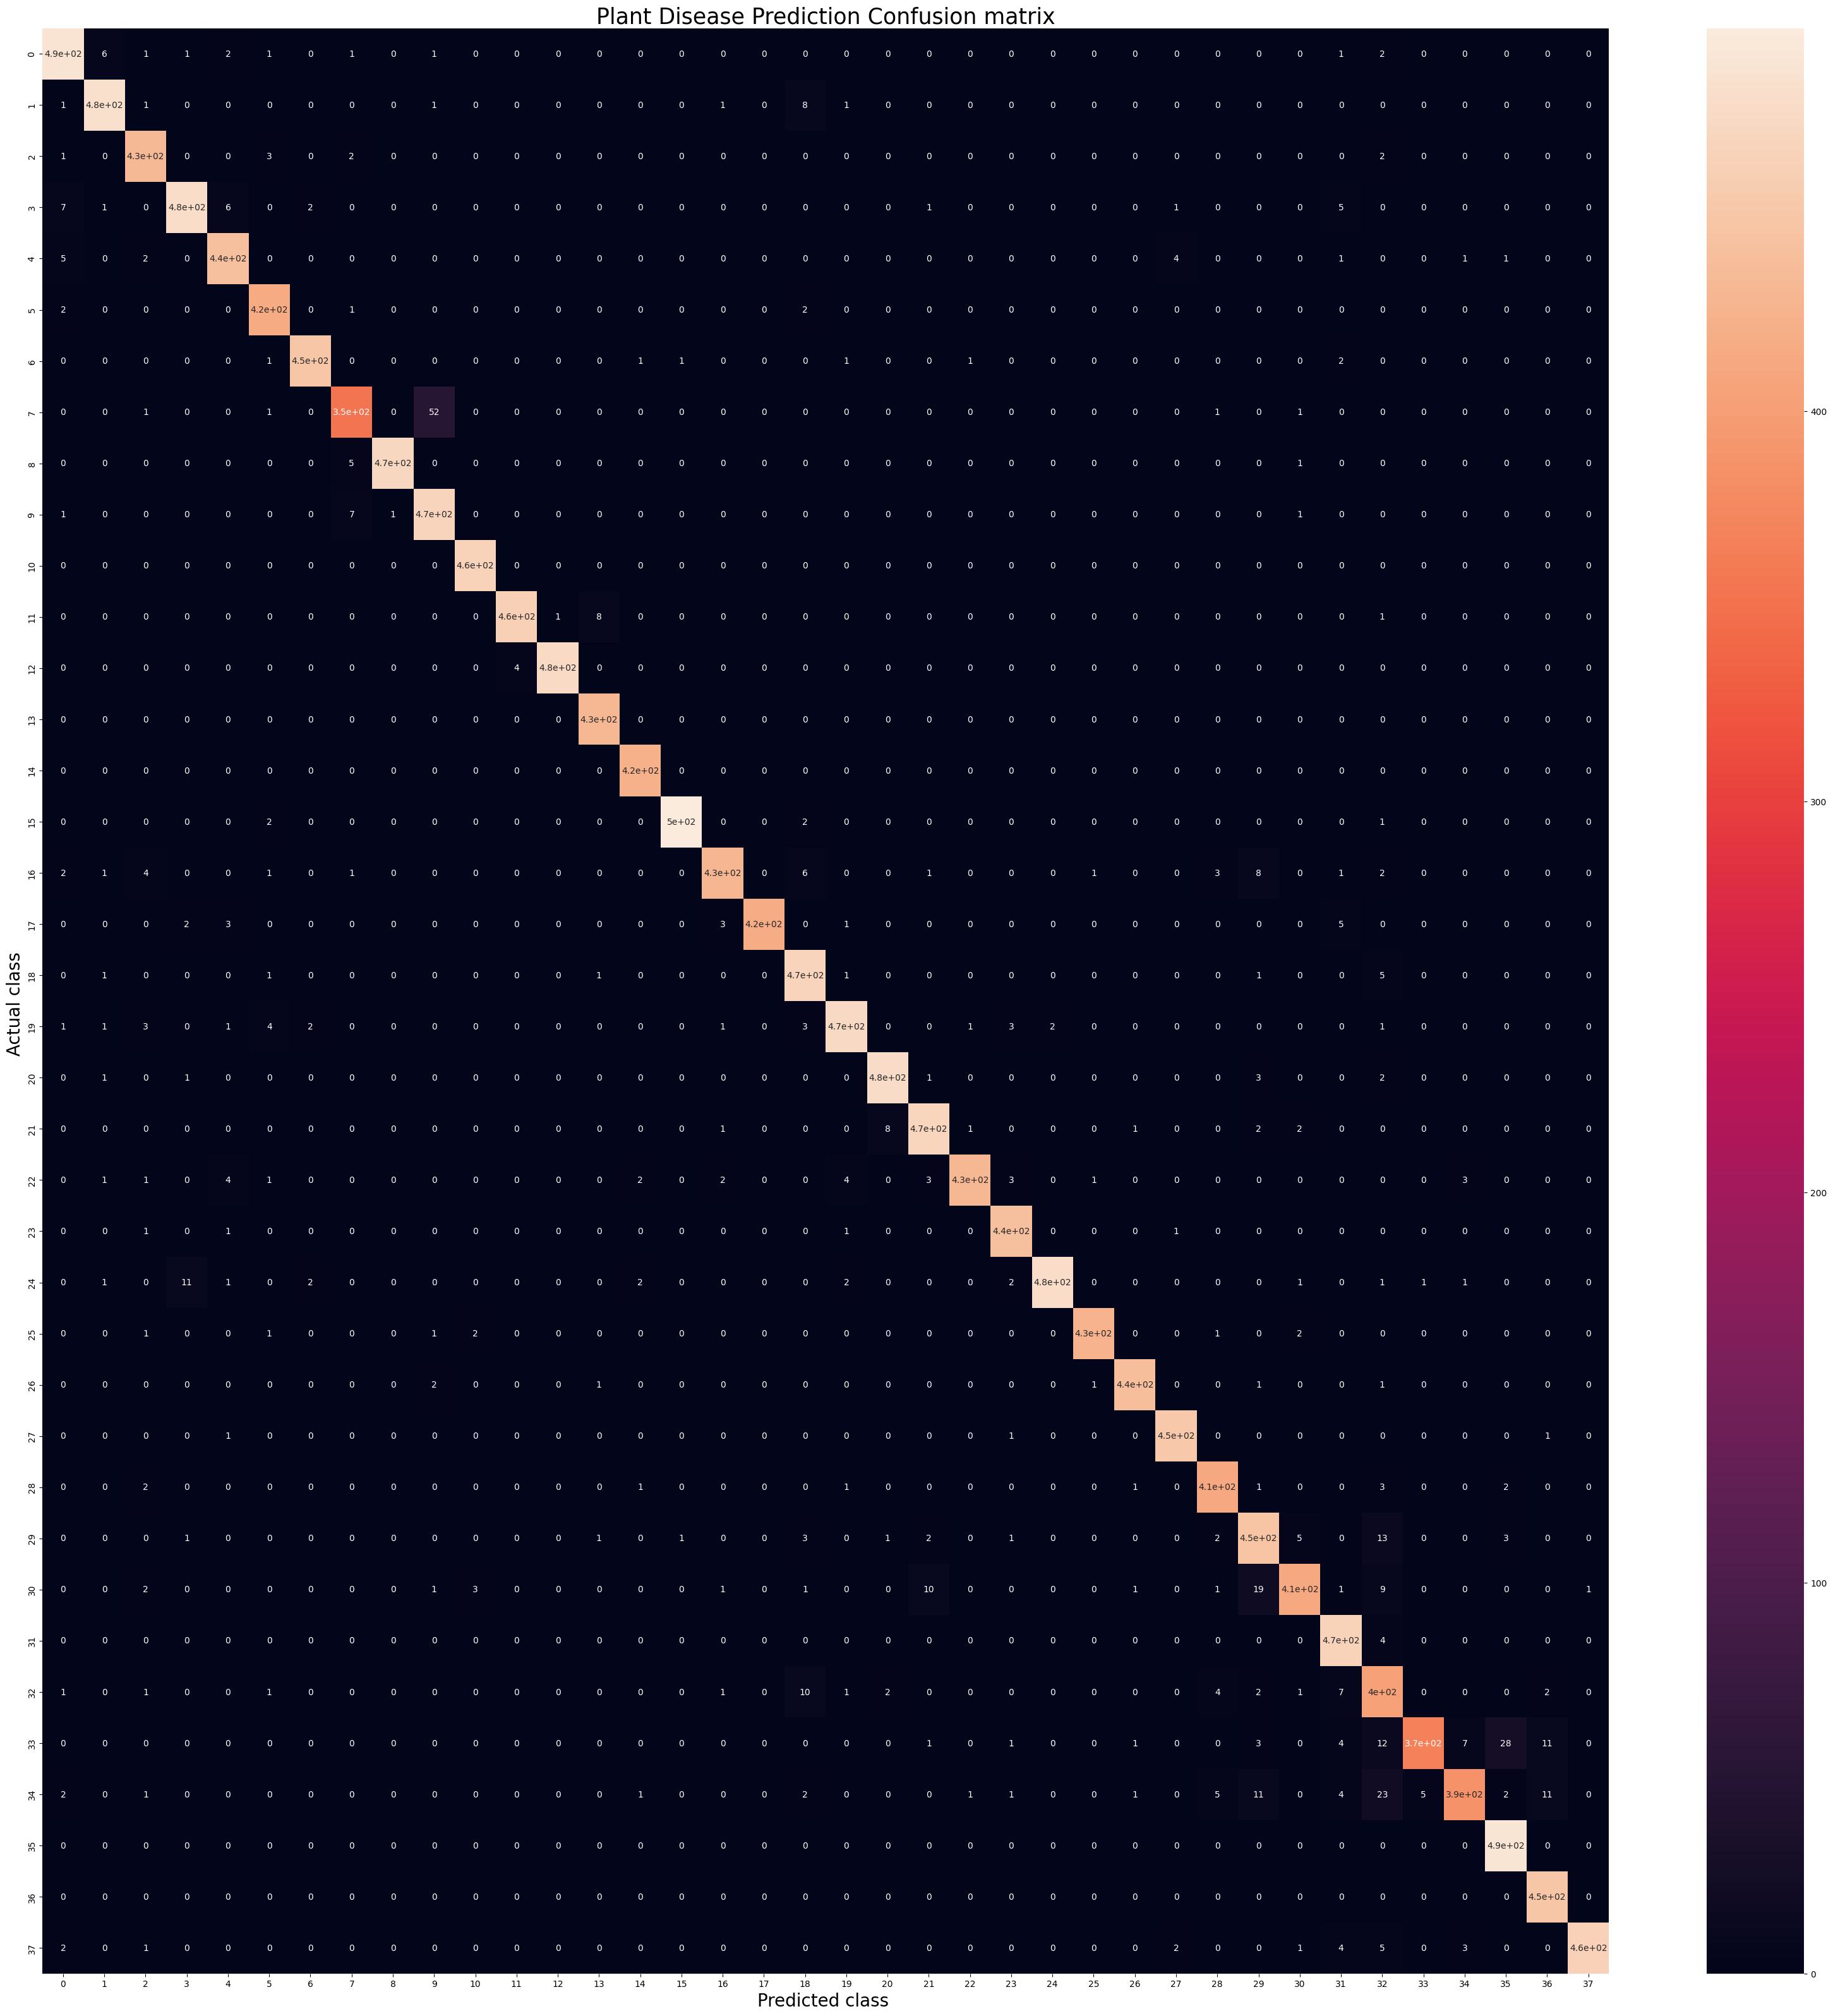

In [70]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel('Predicted class ' ,fontsize=20)
plt.ylabel('Actual class ' ,fontsize=20)
plt.title('Plant Disease Prediction Confusion matrix', fontsize=25)
plt.show()